## Importing libraries and loading the file

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#load dataset

df = pd.read_csv('house_price.csv')

In [9]:
df


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4,4615
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3,6245
4,Kothanur,2 BHK,1200.00,2.00,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.00,4.00,231.00,5,6689
13196,other,4 BHK,3600.00,5.00,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.00,2.00,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.00,4.00,488.00,4,10407


In [10]:
df.shape  #the shape parameter to get the shape of the dataset.

(13200, 7)

In [11]:

df.info()  #the columns and their data types
df.describe()  #  statistical summary of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00,13200.00,13200.00,13200.00,13200.00
mean,1555.30,2.69,112.28,2.80,7920.34
std,1237.32,1.34,149.18,1.29,106727.16
min,1.00,1.00,8.00,1.00,267.00
25%,1100.00,2.00,50.00,2.00,4267.00
50%,1275.00,2.00,71.85,3.00,5438.00
75%,1672.00,3.00,120.00,3.00,7317.00
max,52272.00,40.00,3600.00,43.00,12000000.00


Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)
a) Mean and Standard deviation
b)Percentile method
c) IQR(Inter quartile range method)
d) Z Score method

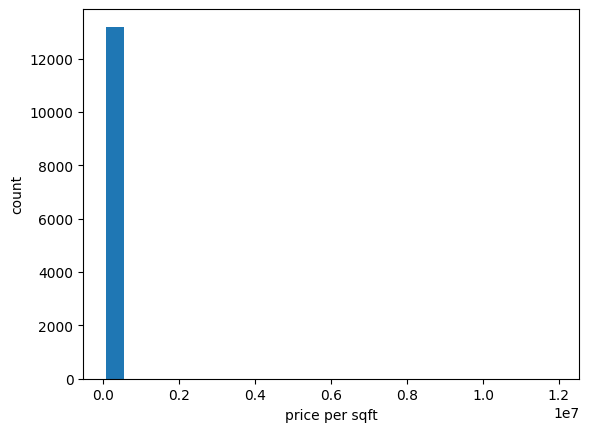

In [14]:

plt.hist(df['price_per_sqft'],bins=20,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel('count')
plt.show()
# This data set has some very bad outliers. Because we see only one bar with more than 12000 data points but on the right hand there are
#data points that have higher value of price per sqft but count of datapoints is very less copmared to 12000 hence we can not see

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

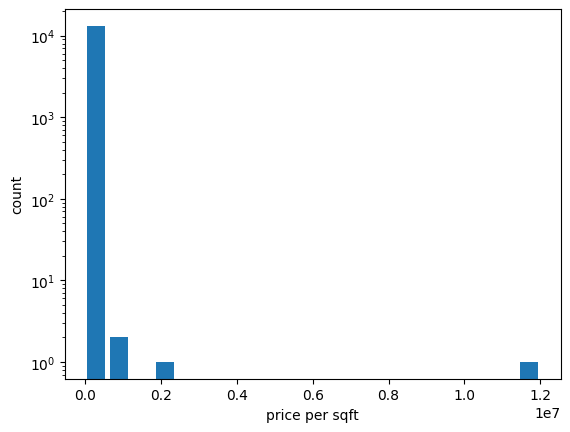

In [15]:
#logscale for better view
plt.hist(df['price_per_sqft'],bins=20,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel('count')
plt.yscale('log')
plt.plot

<Axes: xlabel='price_per_sqft'>

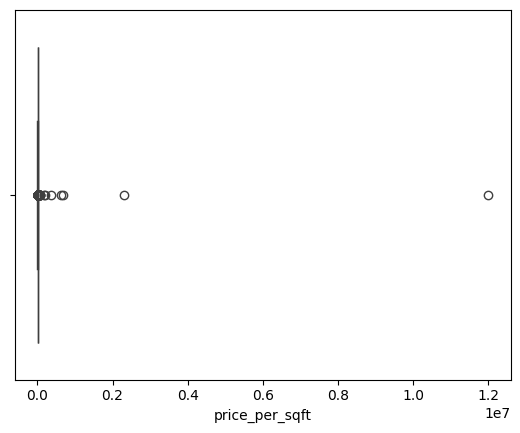

In [68]:
#to see outliers clearly

sns.boxplot(x='price_per_sqft', data=df)

# Remove outliers using Mean and Standard deviation

In [24]:


mean = df['price_per_sqft'].mean()
std  = df['price_per_sqft'].std()
print("Mean :",mean)
print("Standard deviation :",std)

upper_limit = mean + std
lower_limit = mean- std
print("Lower limit :", lower_limit)
print("upper limit :",upper_limit)

#find the outliers
outliers = df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft']<lower_limit)]
print("outliers   :\n", outliers)


Mean : 7920.336742424242
Standard deviation : 106727.16032810867
Lower limit : -98806.82358568443
upper limit : 114647.49707053292
outliers   :
              location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom       11.00  3.00  74.00    3          672727
1005            other      1 BHK       15.00  1.00  30.00    1          200000
1106            other  5 Bedroom       24.00  2.00 150.00    5          625000
4044   Sarjapur  Road  4 Bedroom        1.00  4.00 120.00    4        12000000
4924            other      7 BHK        5.00  7.00 115.00    7         2300000
7575            other      1 BHK      425.00  1.00 750.00    1          176470
11447      Whitefield  4 Bedroom       60.00  4.00 218.00    4          363333


New data after removing outliers : 
                        location       size  total_sqft  bath  price  bhk  \
0      Electronic City Phase II      2 BHK     1056.00  2.00  39.07    2   
1              Chikka Tirupathi  4 Bedroom     2600.00  5.00 120.00    4   
2                   Uttarahalli      3 BHK     1440.00  2.00  62.00    3   
3            Lingadheeranahalli      3 BHK     1521.00  3.00  95.00    3   
4                      Kothanur      2 BHK     1200.00  2.00  51.00    2   
...                         ...        ...         ...   ...    ...  ...   
13195                Whitefield  5 Bedroom     3453.00  4.00 231.00    5   
13196                     other      4 BHK     3600.00  5.00 400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK     1141.00  2.00  60.00    2   
13198           Padmanabhanagar      4 BHK     4689.00  4.00 488.00    4   
13199              Doddathoguru      1 BHK      550.00  1.00  17.00    1   

       price_per_sqft  
0                3699  
1 

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

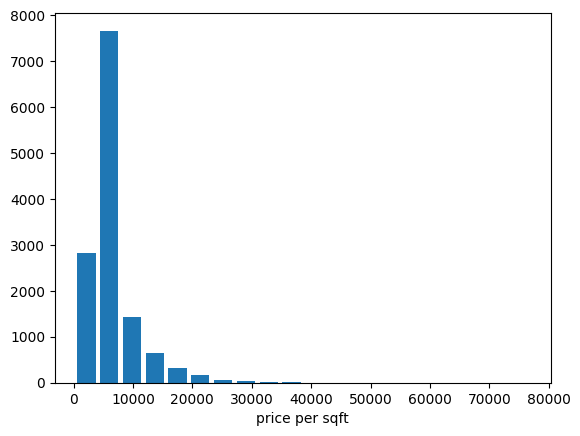

In [34]:
#trimming the outliers

df2 = df[(df['price_per_sqft']< upper_limit) & (df['price_per_sqft'] > lower_limit)]
print("New data after removing outliers : \n",df2)

print("Before removing outliers :", df.shape)
print("After removing outliers :", df2.shape)

print("Total number of outliers removed : ", df.shape[0] - df2.shape[0])

plt.hist(df2['price_per_sqft'],bins= 20,rwidth=0.8)
plt.xlabel("price per sqft")
plt.plot


<Axes: xlabel='price_per_sqft'>

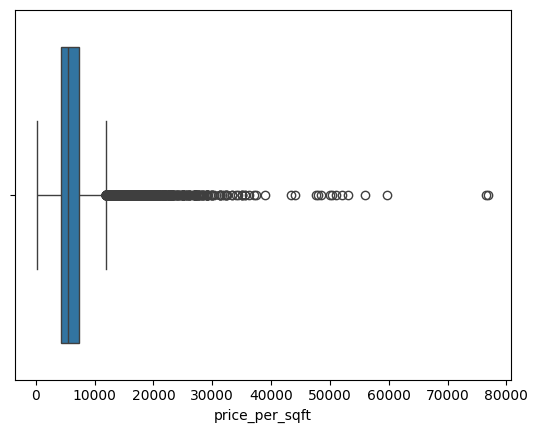

In [67]:
sns.boxplot(x='price_per_sqft', data=df2)

# REMOVE OUTLIERS USING PERCENTILES

In [48]:
#lower and upper limit using percentiles
lower_percentile = 5
upper_percentile = 95
lower_limit = df['price_per_sqft'].quantile(lower_percentile/100)
upper_limit = df['price_per_sqft'].quantile(upper_percentile/100)
print("Lower limit :", lower_limit)
print("upper limit :",upper_limit)
outliers = df[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] <lower_limit)]

print("Outliers : \n",outliers)


Lower limit : 3107.8500000000004
upper limit : 15312.099999999984
Outliers : 
                location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK     3300.00  4.00 600.00    4   
9                 other  6 Bedroom     1020.00  6.00 370.00    6   
20              Kengeri      1 BHK      600.00  1.00  15.00    1   
41       Sarjapur  Road      3 BHK     1254.00  3.00  38.00    3   
45           HSR Layout  8 Bedroom      600.00  9.00 200.00    8   
...                 ...        ...         ...   ...    ...  ...   
13157             other  7 Bedroom     1400.00  7.00 218.00    7   
13185          Hulimavu      1 BHK      500.00  1.00 220.00    1   
13186             other  4 Bedroom     1200.00  5.00 325.00    4   
13191  Ramamurthy Nagar  7 Bedroom     1500.00  9.00 250.00    7   
13199      Doddathoguru      1 BHK      550.00  1.00  17.00    1   

       price_per_sqft  
7               18181  
9               36274  
20               2500  
41      

New data after removing outliers : 
                        location       size  total_sqft  bath  price  bhk  \
0      Electronic City Phase II      2 BHK     1056.00  2.00  39.07    2   
1              Chikka Tirupathi  4 Bedroom     2600.00  5.00 120.00    4   
2                   Uttarahalli      3 BHK     1440.00  2.00  62.00    3   
3            Lingadheeranahalli      3 BHK     1521.00  3.00  95.00    3   
4                      Kothanur      2 BHK     1200.00  2.00  51.00    2   
...                         ...        ...         ...   ...    ...  ...   
13194         Green Glen Layout      3 BHK     1715.00  3.00 112.00    3   
13195                Whitefield  5 Bedroom     3453.00  4.00 231.00    5   
13196                     other      4 BHK     3600.00  5.00 400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK     1141.00  2.00  60.00    2   
13198           Padmanabhanagar      4 BHK     4689.00  4.00 488.00    4   

       price_per_sqft  
0                3699  
1 

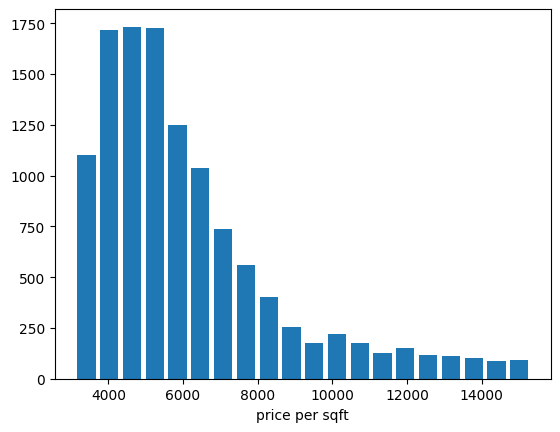

In [49]:
#trimming outliers using percentiles

df3 = df[(df['price_per_sqft'] <upper_limit) &(df['price_per_sqft'] >lower_limit)]

print("New data after removing outliers : \n",df3)

print("Before removing outliers :", df.shape)
print("After removing outliers :", df3.shape)

print("Total number of outliers removed : ", df.shape[0] - df3.shape[0])

plt.hist(df3['price_per_sqft'],bins=20,rwidth=0.8)
plt.xlabel("price per sqft")
plt.show()

<Axes: xlabel='price_per_sqft'>

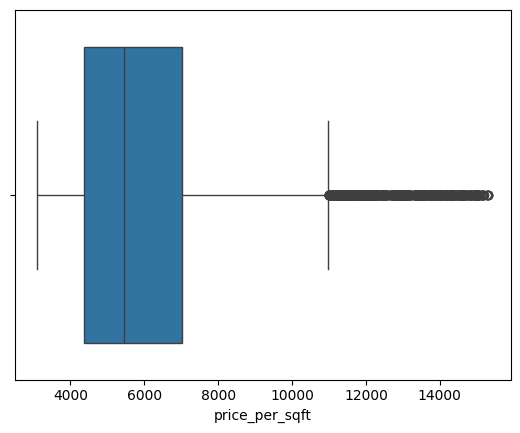

In [66]:
sns.boxplot(x='price_per_sqft', data=df3)

# REMOVE OUTLIERS USING IQR

In [53]:
#The IQR method involves calculating the 25th percentile (Q1) and the 75th percentile (Q3) to determine the IQR,
#  and then defining outlier bounds as 1.5 times the IQR below Q1 and above Q3

q1 = df['price_per_sqft'].quantile(0.25)
q2 = df['price_per_sqft'].quantile(0.75)

## Calculate IQR (Interquartile Range)
iqr = q2-q1 

print("q1, q2, iqr : ",q1,q2,iqr)


#define bounds for filtering
upper_limit = q2+(1.5 * iqr)
lower_limit = q1-(1.5 * iqr)
print("Lower limit :", lower_limit)
print("upper limit :",upper_limit)

#find the outliers

outliers = df[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]
print("Outliers : \n",outliers)

q1, q2, iqr :  4267.0 7317.0 3050.0
Lower limit : -308.0
upper limit : 11892.0
Outliers : 
                location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK     3300.00  4.00 600.00    4   
9                 other  6 Bedroom     1020.00  6.00 370.00    6   
22          Thanisandra  4 Bedroom     2800.00  5.00 380.00    4   
45           HSR Layout  8 Bedroom      600.00  9.00 200.00    8   
48             KR Puram  2 Bedroom      800.00  1.00 130.00    2   
...                 ...        ...         ...   ...    ...  ...   
13142             other      2 BHK     1140.00  1.00 185.00    2   
13157             other  7 Bedroom     1400.00  7.00 218.00    7   
13185          Hulimavu      1 BHK      500.00  1.00 220.00    1   
13186             other  4 Bedroom     1200.00  5.00 325.00    4   
13191  Ramamurthy Nagar  7 Bedroom     1500.00  9.00 250.00    7   

       price_per_sqft  
7               18181  
9               36274  
22              135

New data after removing outliers : 
                        location       size  total_sqft  bath  price  bhk  \
0      Electronic City Phase II      2 BHK     1056.00  2.00  39.07    2   
1              Chikka Tirupathi  4 Bedroom     2600.00  5.00 120.00    4   
2                   Uttarahalli      3 BHK     1440.00  2.00  62.00    3   
3            Lingadheeranahalli      3 BHK     1521.00  3.00  95.00    3   
4                      Kothanur      2 BHK     1200.00  2.00  51.00    2   
...                         ...        ...         ...   ...    ...  ...   
13195                Whitefield  5 Bedroom     3453.00  4.00 231.00    5   
13196                     other      4 BHK     3600.00  5.00 400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK     1141.00  2.00  60.00    2   
13198           Padmanabhanagar      4 BHK     4689.00  4.00 488.00    4   
13199              Doddathoguru      1 BHK      550.00  1.00  17.00    1   

       price_per_sqft  
0                3699  
1 

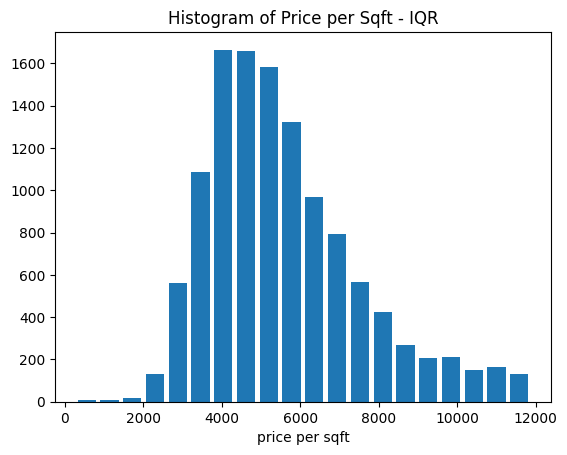

In [70]:
#trimming outliers

df4 = df[(df['price_per_sqft'] < upper_limit) & (df['price_per_sqft']> lower_limit)]

print("New data after removing outliers : \n",df4)

print("Before removing outliers :", df.shape)
print("After removing outliers :", df4.shape)

print("Total number of outliers removed : ", df.shape[0] - df4.shape[0])

plt.hist(df4['price_per_sqft'],bins=20,rwidth =0.8)
plt.xlabel("price per sqft")
plt.title('Histogram of Price per Sqft - IQR')
plt.show()


Text(0.5, 1.0, 'Boxplot of Price per Sqft - IQR')

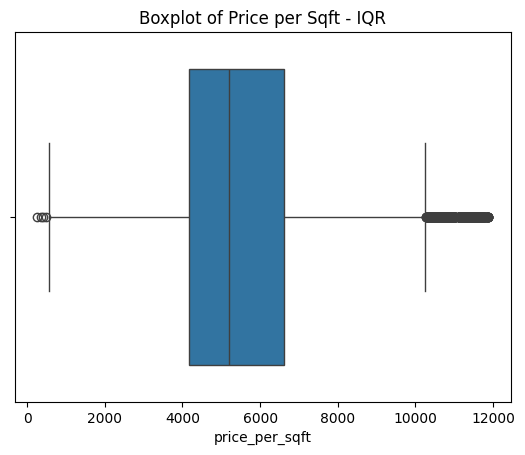

In [69]:
sns.boxplot(x='price_per_sqft', data=df4)
plt.title('Boxplot of Price per Sqft - IQR')

## Remove outliers using z score. Use z score of 3 as your threshold

In [81]:
#Z = (X - μ) / σ
df['z-score'] = (df['price_per_sqft']-df['price_per_sqft'].mean())/df['price_per_sqft'].std()
outliers = df[(df['z-score'] > 3) | (df['z-score'] < -3)]
print("Outliers : \n",outliers)
outliers.shape


Outliers : 
              location       size  total_sqft  bath  price  bhk  \
345             other  3 Bedroom       11.00  3.00  74.00    3   
1106            other  5 Bedroom       24.00  2.00 150.00    5   
4044   Sarjapur  Road  4 Bedroom        1.00  4.00 120.00    4   
4924            other      7 BHK        5.00  7.00 115.00    7   
11447      Whitefield  4 Bedroom       60.00  4.00 218.00    4   

       price_per_sqft  z-score  
345            672727     6.23  
1106           625000     5.78  
4044         12000000   112.36  
4924          2300000    21.48  
11447          363333     3.33  


(5, 8)

New data after removing outliers : 
                        location       size  total_sqft  bath  price  bhk  \
0      Electronic City Phase II      2 BHK     1056.00  2.00  39.07    2   
1              Chikka Tirupathi  4 Bedroom     2600.00  5.00 120.00    4   
2                   Uttarahalli      3 BHK     1440.00  2.00  62.00    3   
3            Lingadheeranahalli      3 BHK     1521.00  3.00  95.00    3   
4                      Kothanur      2 BHK     1200.00  2.00  51.00    2   
...                         ...        ...         ...   ...    ...  ...   
13195                Whitefield  5 Bedroom     3453.00  4.00 231.00    5   
13196                     other      4 BHK     3600.00  5.00 400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK     1141.00  2.00  60.00    2   
13198           Padmanabhanagar      4 BHK     4689.00  4.00 488.00    4   
13199              Doddathoguru      1 BHK      550.00  1.00  17.00    1   

       price_per_sqft  z-score  
0                

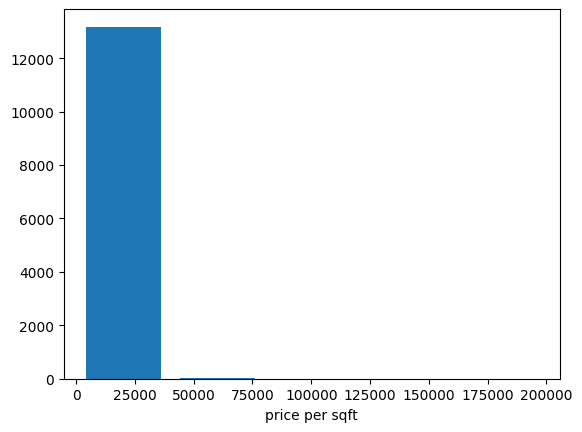

In [77]:
#trimming outliers using Z-Score
df5 = df[(df['z-score'] < 3) & (df['z-score'] > -3)] 
print("New data after removing outliers : \n",df5)

print("Before removing outliers :", df.shape)
print("After removing outliers :", df5.shape)

print("Total number of outliers removed : ", df.shape[0] - df5.shape[0])

plt.hist(df5['price_per_sqft'],bins=5,rwidth=0.8)
plt.xlabel("price per sqft")
plt.show()

Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

<Axes: xlabel='price_per_sqft'>

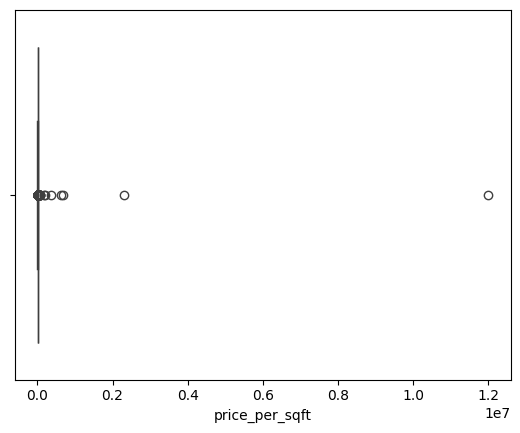

In [83]:
sns.boxplot(x='price_per_sqft', data=df)


Text(0.5, 1.0, 'Box plot - after removing outliers using mean and standard deviation')

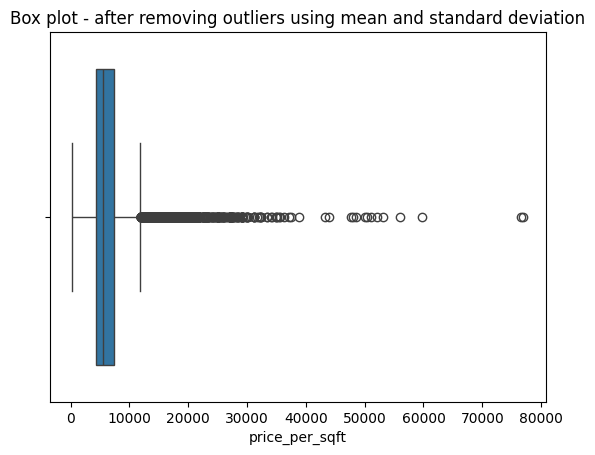

In [89]:
sns.boxplot(x='price_per_sqft', data=df2)
plt.title("Box plot - after removing outliers using mean and standard deviation")


Text(0.5, 1.0, 'Box plot - after removing outliers using Percentile Method')

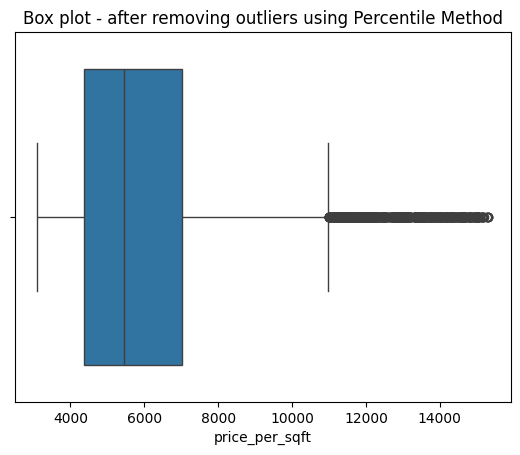

In [90]:
sns.boxplot(x='price_per_sqft', data=df3)
plt.title("Box plot - after removing outliers using Percentile Method")


Text(0.5, 1.0, 'Box plot - after removing outliers using IQR')

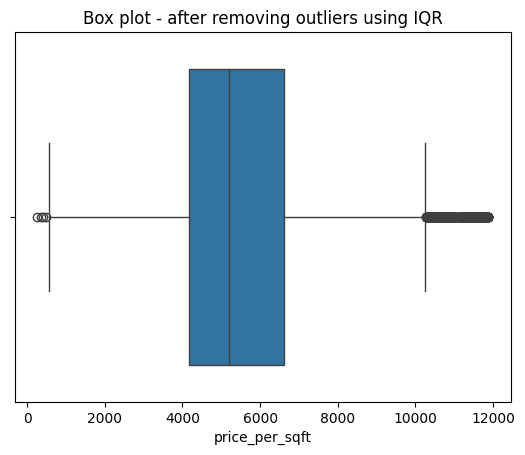

In [91]:
sns.boxplot(x='price_per_sqft', data=df4)
plt.title("Box plot - after removing outliers using IQR")

Text(0.5, 1.0, 'Box plot - after removing outliers using Z-score')

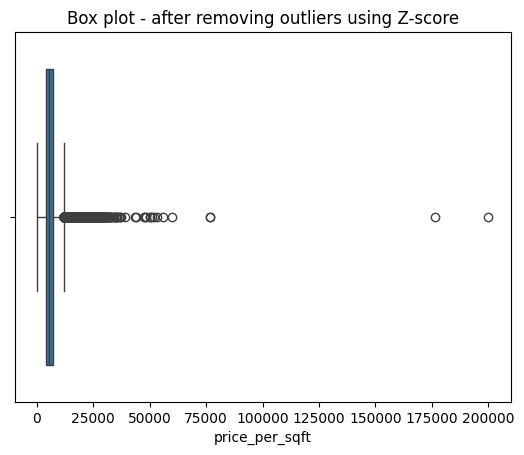

In [92]:
sns.boxplot(x='price_per_sqft', data=df5)
plt.title("Box plot - after removing outliers using Z-score")

# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. (Score:1)

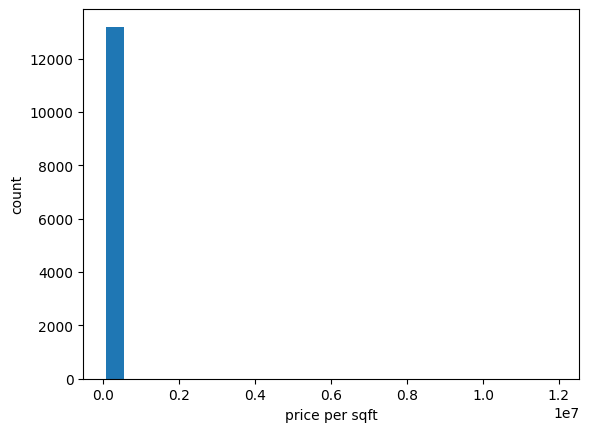

In [93]:
plt.hist(df['price_per_sqft'],bins=20,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel('count')
plt.show()

Above chart is showing that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

# Q5. Check the correlation between all the numerical columns and plot heatmap. (Score:1)

In [97]:
#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. 
# For any non-numeric data type columns in the dataframe it is ignored.

df.corr(numeric_only=True)

,total_sqft,bath,price,bhk,price_per_sqft,z-score
total_sqft,1.00,0.39,0.57,0.35,-0.01,-0.01
bath,0.39,1.00,0.46,0.90,0.03,0.03
price,0.57,0.46,1.00,0.40,0.03,0.03
bhk,0.35,0.90,0.40,1.00,0.03,0.03
price_per_sqft,-0.01,0.03,0.03,0.03,1.00,1.00
z-score,-0.01,0.03,0.03,0.03,1.00,1.00


<Axes: >

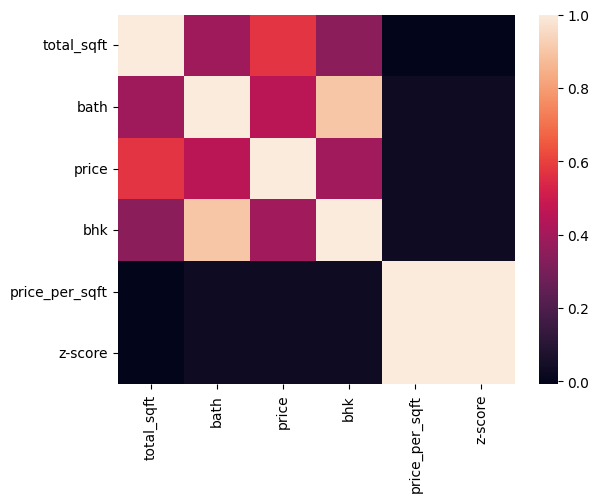

In [98]:
sns.heatmap(df.corr(numeric_only=True))

# Q6. Draw Scatter plot between the variables to check the correlation between them

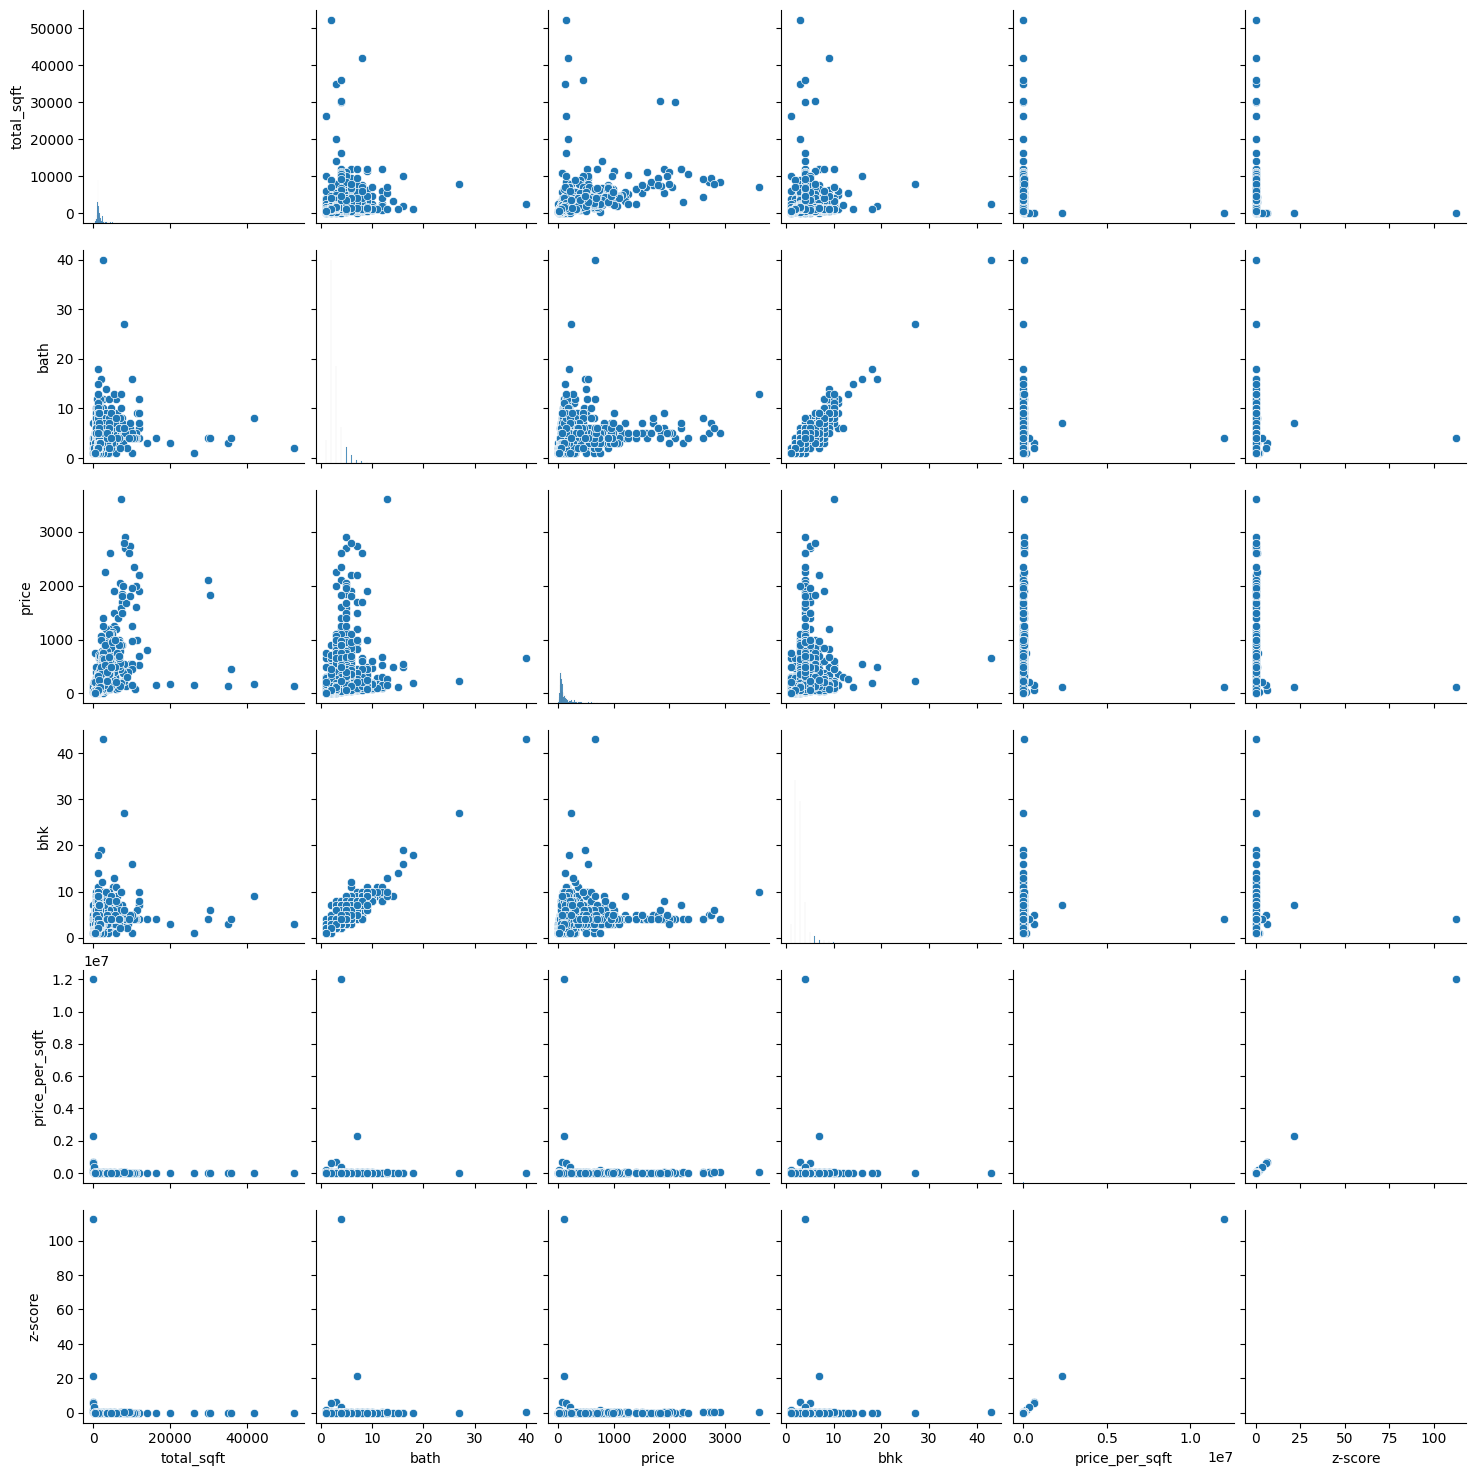

In [99]:
# Using seaborn's pairplot
sns.pairplot(df)